In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.81  Python-3.9.19 torch-2.4.0+cpu CPU (12th Gen Intel Core(TM) i5-12600K)
Setup complete  (16 CPUs, 31.7 GB RAM, 113.7/930.8 GB disk)


## Using YOLOv8 to detect objects in Image

In [3]:
!yolo predict model=yolov8n.pt source='D:/FIU/Projects/Computer_vision/test1.png'

Ultralytics YOLOv8.2.81 🚀 Python-3.9.19 torch-2.4.0+cpu CPU (12th Gen Intel Core(TM) i5-12600K)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 D:\FIU\Projects\Computer_vision\test1.png: 448x640 (no detections), 43.1ms
Speed: 1.5ms preprocess, 43.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Use EasyOCR to detect characters in Image

In [2]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('D:/FIU/Projects/Computer_vision/test1.png')

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# Detect the text
result = reader.readtext(img)

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

c:\Users\esteb\miniconda3\envs\vision\lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(t

In [3]:
print(result)

[([[166, 126], [448, 126], [448, 182], [166, 182]], 'ROAD CLOSED', 0.9994066640174729), ([[167, 181], [447, 181], [447, 221], [167, 221]], 'TO ALL PEDESTRIAN', 0.9704423461894937), ([[209, 220], [409, 220], [409, 258], [209, 258]], 'AND BIKE USE', 0.9281838718124332)]


([[166, 126], [448, 126], [448, 182], [166, 182]], 'ROAD CLOSED', 0.9994066640174729)
([[167, 181], [447, 181], [447, 221], [167, 221]], 'TO ALL PEDESTRIAN', 0.9704423461894937)
([[209, 220], [409, 220], [409, 258], [209, 258]], 'AND BIKE USE', 0.9281838718124332)


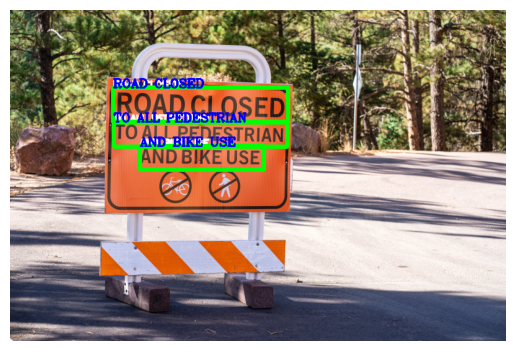

In [10]:
# Lets do it more fancy and see the characters detected directly on the image

threshold = 0.25
# draw bbox and text
for t_, t in enumerate(result):
    print(t)

    bbox, text, score = t
    
    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

# save the image
cv2.imwrite('D:/FIU/Projects/Computer_vision/outputs/ocr1.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## Using YOLOv8 to detect objects in Video

In [17]:
import cv2
from ultralytics import YOLO

# load YOLOv8 model
model = YOLO('yolov8n.pt')

video_path = 'D:/FIU/Projects/Computer vision/test.mp4'
cap = cv2.VideoCapture(video_path)

# Get the frame width, height, and frames per second (fps) of the input video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video_path = 'D:/FIU/Projects/Computer vision/output_video.avi'
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

ret = True

# read frames. This keeps reading the frames of the videos till the video ends.
while ret:
    ret, frame = cap.read()

    if not ret:
        break

    # detect  and track objects
    results = model.track(frame, persist=True)

    # plot the results
    frame_with_tracking = results[0].plot()  # take the first frame to plot

    # Write the frame with tracking to the output video
    out.write(frame_with_tracking)

    # Visualize
    cv2.imshow('YOLOv8 Tracking', frame_with_tracking)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release VideoCapture and VideoWriter
cap.release()
out.release()
# Close all OpenCV windows
cv2.destroyAllWindows()


0: 384x640 1 person, 2 dogs, 32.5ms
Speed: 1.0ms preprocess, 32.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 dogs, 41.2ms
Speed: 1.0ms preprocess, 41.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 dogs, 29.1ms
Speed: 1.0ms preprocess, 29.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 dogs, 30.6ms
Speed: 1.0ms preprocess, 30.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 dogs, 28.7ms
Speed: 1.0ms preprocess, 28.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 dogs, 30.1ms
Speed: 1.5ms preprocess, 30.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 dogs, 26.6ms
Speed: 1.0ms preprocess, 26.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 dogs, 25.8ms
Speed: 1.0ms preprocess, 